<a href="https://colab.research.google.com/github/IvanIri/Aprendizaje-Automatico/blob/main/TP3_AA1_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

Iván Irigoyen

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

In [16]:
import pandas as pd

# Carga del dataset
url = 'https://raw.githubusercontent.com/IvanIri/Aprendizaje-Automatico/refs/heads/main/processed.cleveland.data'

df = pd.read_csv(url, header=None)

# Definición de los nombres de las columnas
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"]

# Renombre las columnas para faciltar el analisis
df = df.rename(columns={
    "age": "edad",
    "sex": "sexo",
    "cp": "tipo_dolor_pecho",
    "trestbps": "presion_reposo",
    "chol": "colesterol",
    "fbs": "glucosa_ayunas",
    "restecg": "ecg_reposo",
    "thalach": "fc_maxima",
    "exang": "angina_ejercicio",
    "oldpeak": "depresion_st",
    "slope": "pendiente_st",
    "ca": "vasos_coloreados",
    "thal": "thalassemia",
    "target": "enfermedad"
})

# Dejamos el dataset con el target en binario
df["enfermedad"] = (df["enfermedad"] > 0).astype(int)

# Renombramos el dataset
cardiopatia = df

cardiopatia.head()

,edad,sexo,tipo_dolor_pecho,presion_reposo,colesterol,glucosa_ayunas,ecg_reposo,fc_maxima,angina_ejercicio,depresion_st,pendiente_st,vasos_coloreados,thalassemia,enfermedad
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

In [17]:
# Descripción de variables

cardiopatia.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sexo,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
tipo_dolor_pecho,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
presion_reposo,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
colesterol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
glucosa_ayunas,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
ecg_reposo,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
fc_maxima,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
angina_ejercicio,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
depresion_st,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


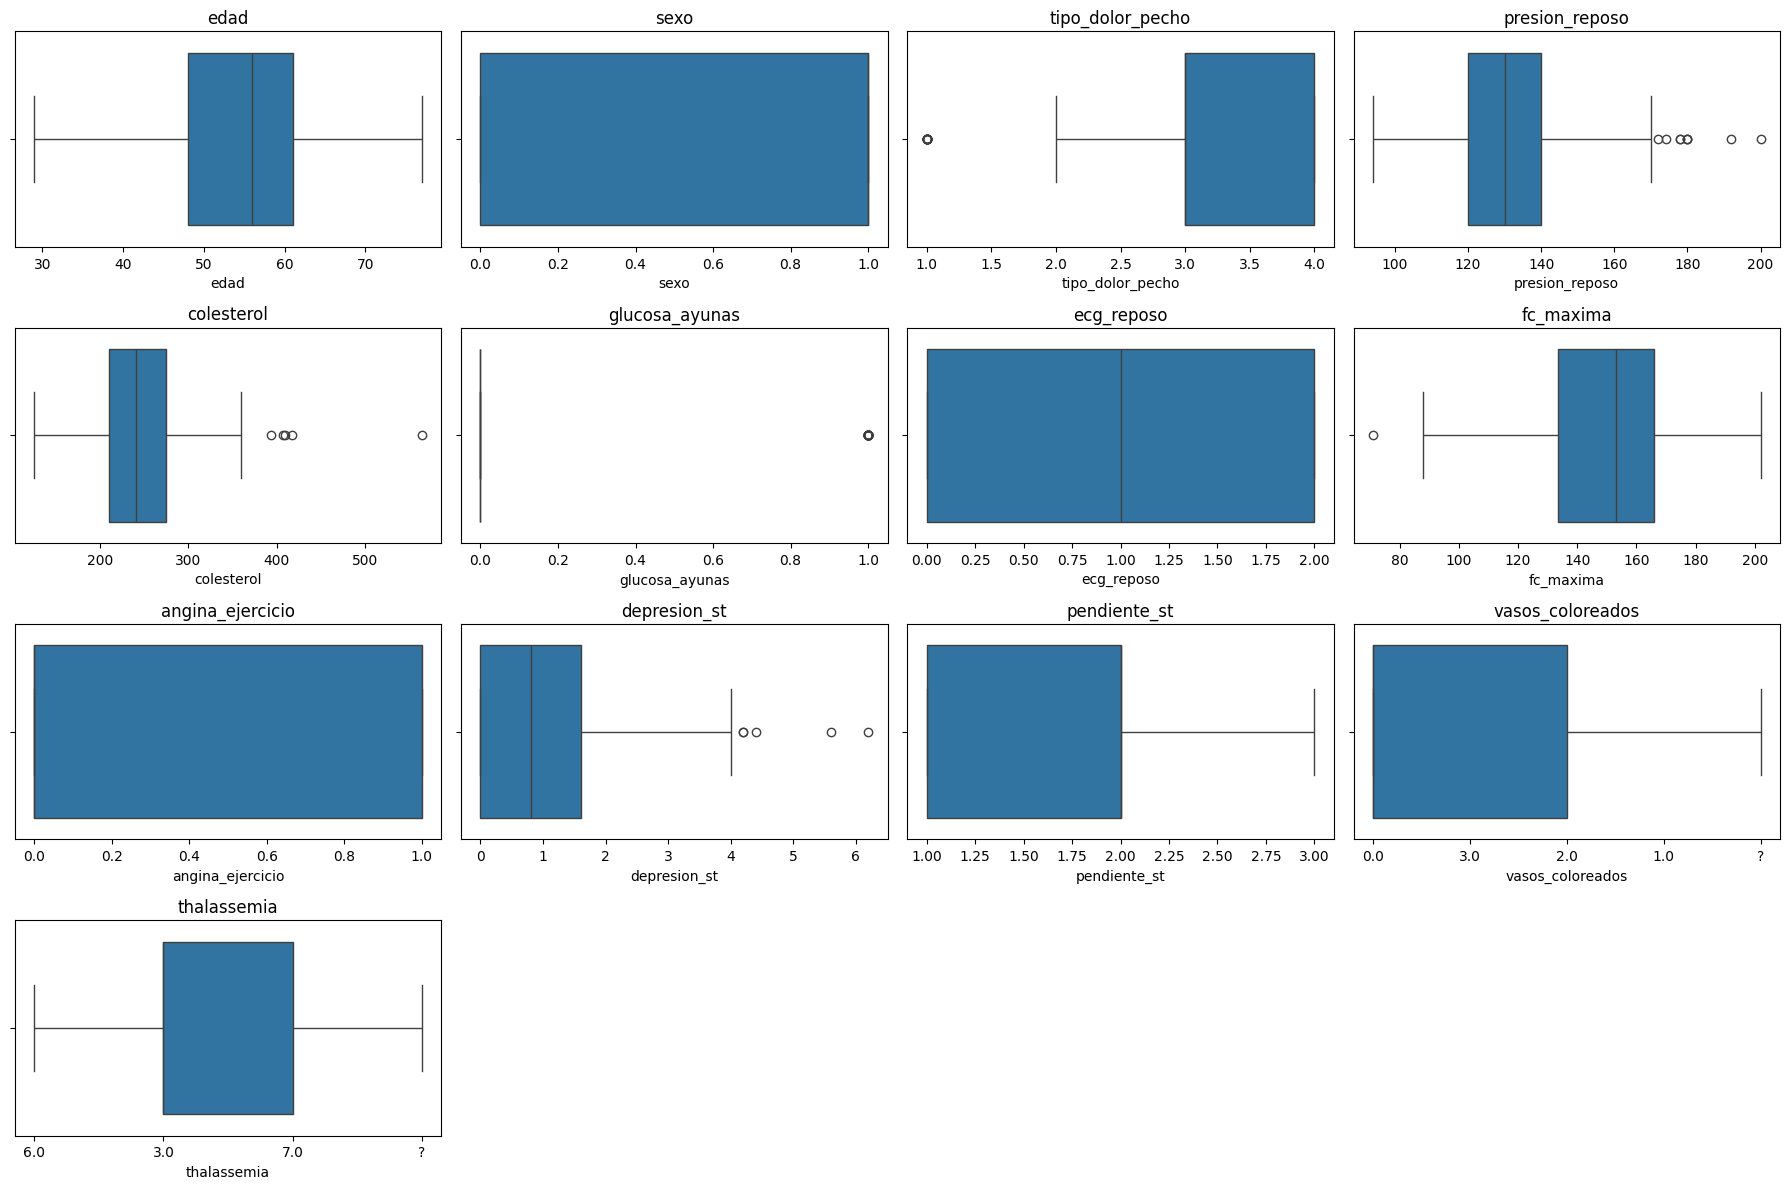

In [18]:
# Boxplot para encotrar outliers

import seaborn as sns
import matplotlib.pyplot as plt


features = cardiopatia.columns[:-1]   # todas menos target

plt.figure(figsize=(18, 12))

for i, col in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

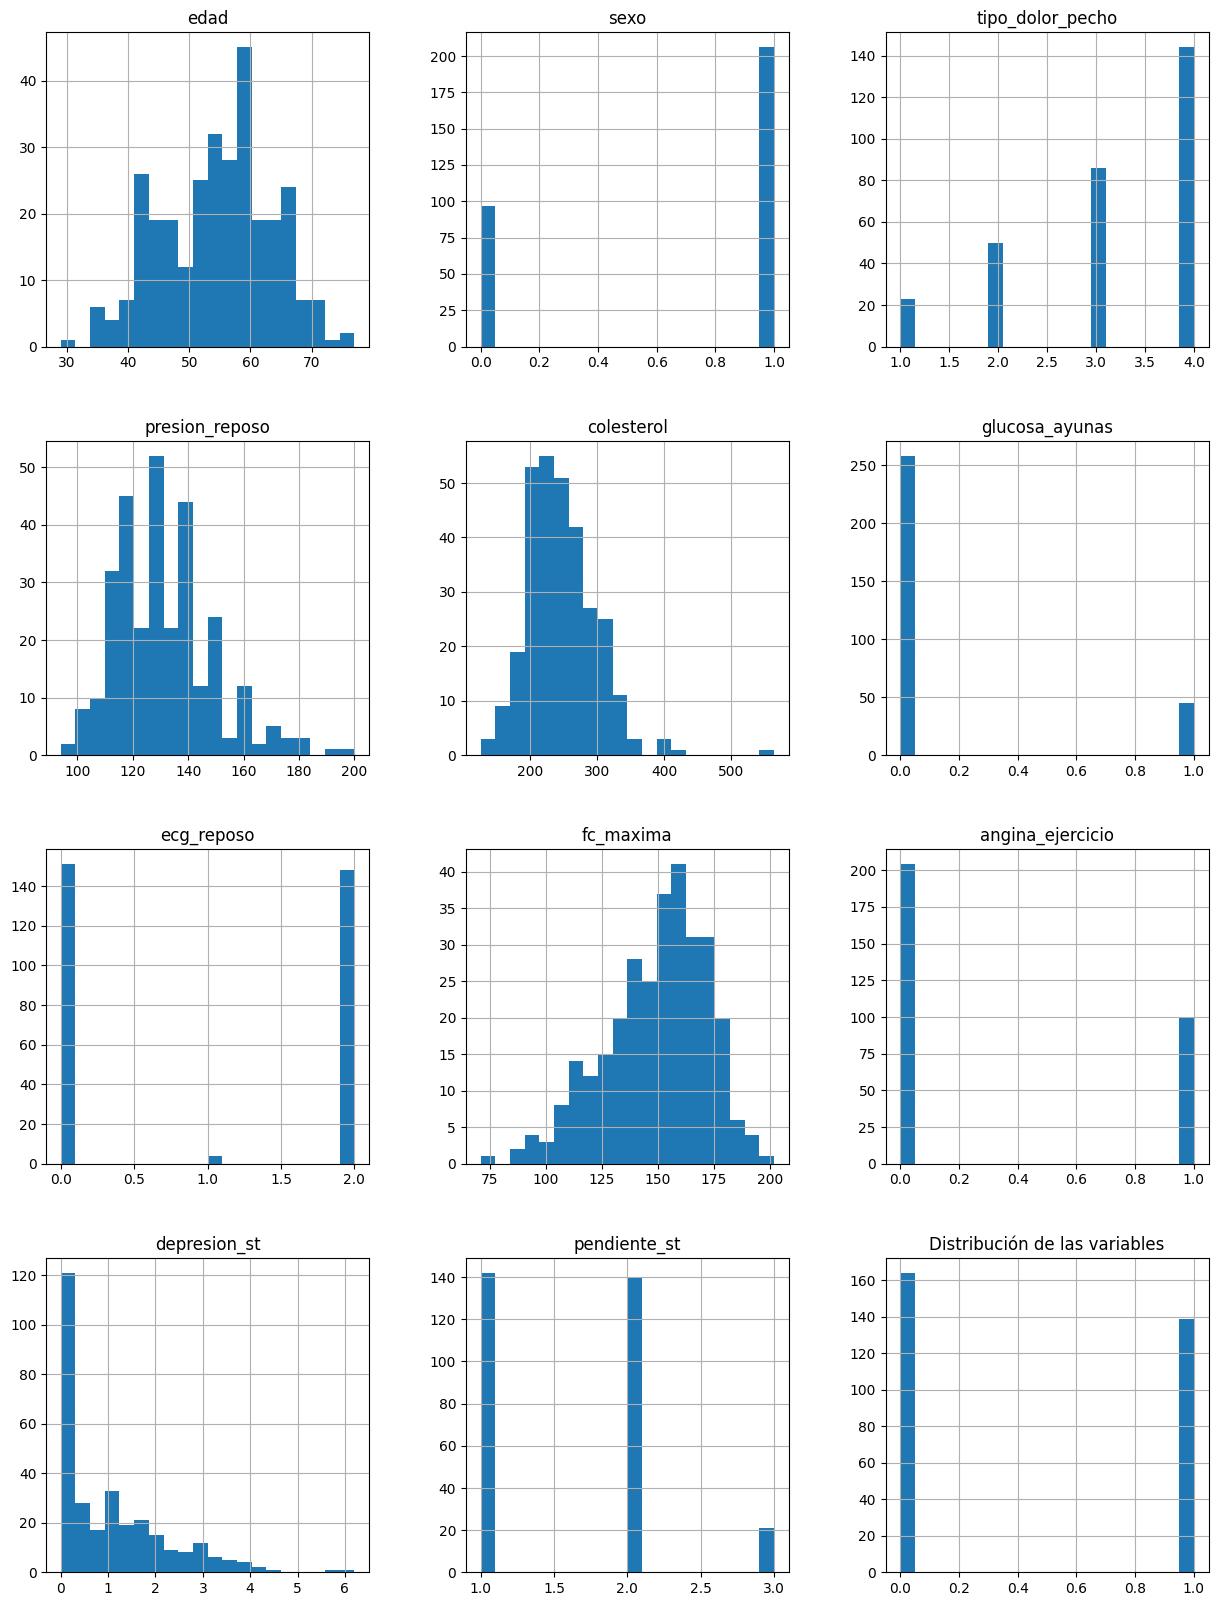

In [19]:
# Histograma para ver la distribución

cardiopatia.hist(figsize=(15, 20), bins=20)
plt.title("Distribución de las variables")
plt.show()

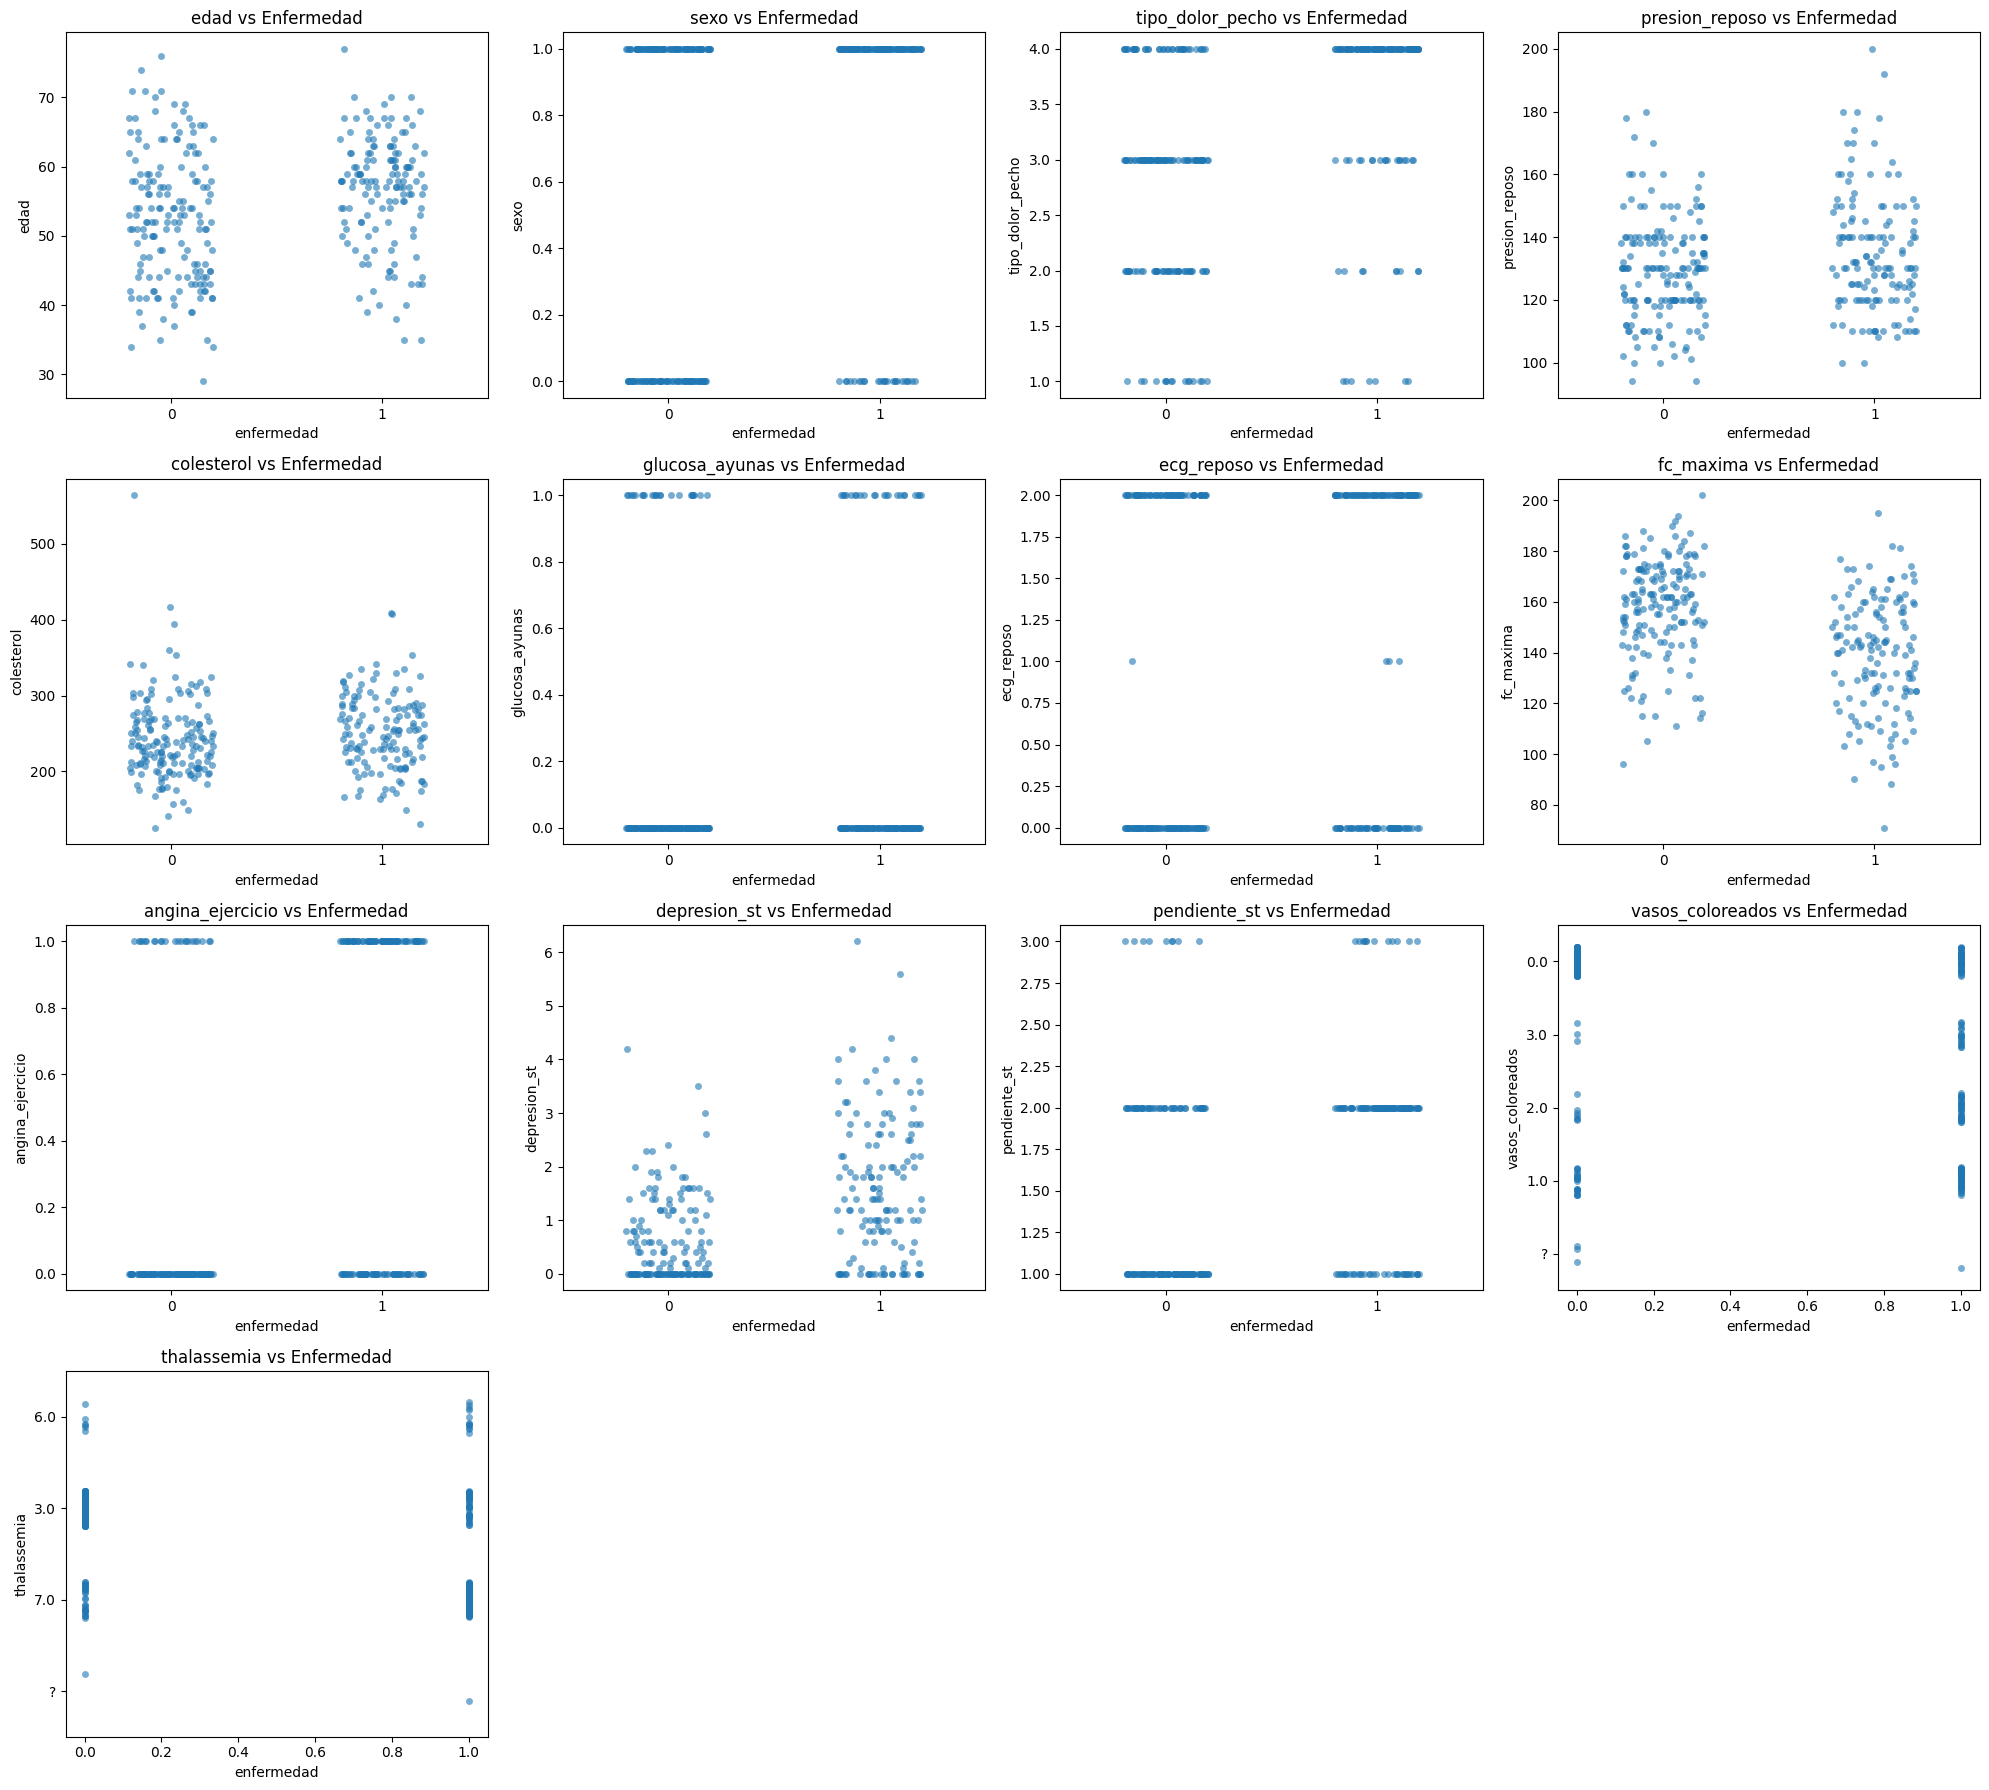

In [20]:
# Scatterplot entre features y target

features = cardiopatia.columns[:-1]
target = cardiopatia.columns[-1]

plt.figure(figsize=(20, 18))

for i, col in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.stripplot(x="enfermedad", y=col, data=cardiopatia, jitter=0.2, alpha=0.6)
    plt.title(f"{col} vs Enfermedad")

plt.tight_layout()
plt.show()

### Conclusiones:

Se observa que la media de edad de los pacientes es de 56 años y que por lo menos el 50% tienen entre 50 y 60 años.

La media de sexo dío un valor de 0.68, dado que en el dataset hombres = 1 y mujeres = 0 esto nos esta diciendo que la mayoría de pasientes enfermos son hombres.

Hay una tendencía que los pacientes que presetan mayores niveles de depresión sean enfermos.

También los niveles mas altos de thalassemia presentan más positivos de un cardiopatia al igual que los niveles altos de precisión en reposo.

Luego en el caso de "tipo de dolor en el pecho" se ve que los pacientes positivos tienen a tener mayores niveles de dolores, muy pocos positivos presentan un bajo nivel de dolor, en cambio los negativos se acumulan en todas las escalas.

Luego en el resto de variables no se observan diferencías muy claras entre pacientes positivos y negativos.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Resolución:

In [21]:
# Cantidad de filas y columnas.

cardiopatia.shape

(303, 14)

In [22]:
import numpy as np

# Reemplazar valores ? por Nan
cardiopatia = cardiopatia.replace('?', np.nan)

# Convertir todas las columnas a numericas
cardiopatia = cardiopatia.apply(pd.to_numeric, errors='coerce')

# Eliminar filas con datos faltantes
cardiopatia = cardiopatia.dropna().reset_index(drop=True)

cardiopatia.shape

(297, 14)

TRATAMIENTO DE LOS OUTLIERS

No se eliminaron lo outliers por q al ser un dataset medico es posible que esos valores sean reales. que pueden ser de importancía para el analisis.

DESCARTE DE FEATURES

No se descarta ningún feature, el dataset tiene 14 y todas pueden tener una relevancia para el analisis dado el caracter medico del dataset.

VARIABLES CATEGORICAS

Estás 7 variables son categoricas. sexo, tipo_dolor_pecho, ecg_reposo, angina_ejercicio, pendiente_st, vasos_coloreados, thalassemia.

Y se utilizarán las 7, estas agrupan gran cantidad de información y serán muy relevantes para el analisis.

CARACTERISTICAS DEL DATASET

El dataset tiene 297 filas y 14 columnas.

La variable target será "enfermedad", esta es binaria, siendo 0 = sano y 1 = enfermo.

El tipo de problema es de Clasificación Binaria.

El dataset carece de variables de texto y sin mucha dimensionalidad.

In [23]:
# División del dataset en Train y Test

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definición de variables en X y en y
X = cardiopatia.drop('enfermedad', axis=1)
y = cardiopatia['enfermedad']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify = y)




## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

In [24]:
from sklearn.linear_model import LogisticRegression

# Modelo
clf = LogisticRegression(max_iter= 1000)

# Entrenamiento del modelo
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 4.1 Entrenamiento y evaluación

In [25]:
# Prediccion
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Matriz de confusión
conf_matriz = confusion_matrix(y_test, y_pred_test)

print("=========== Matriz de confusión: ===========")
print(conf_matriz)


# Calculo de metricas para el Train
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Calculo de metricas para el Test
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Impresion de metricas

print("\n =========== Metricas del Train: ===========")
print(f"Exactitud (accuracy): {accuracy_train}")
print(f"Precisión (recision): {precision_train}")
print(f"Sensibilidad (recall): {recall_train}")
print(f"F1 Score: {f1_train}")

print("\n =========== Metricas del Test: ===========")
print(f"Exactitud (accuracy): {accuracy}")
print(f"Precisión (recision): {precision}")
print(f"Sensibilidad (recall): {recall}")
print(f"F1 Score: {f1}")

=========== Matriz de confusión: ===========
[[28  4]
 [ 6 22]]

 =========== Metricas del Train: ===========
Exactitud (accuracy): 0.8523206751054853
Precisión (recision): 0.8557692307692307
Sensibilidad (recall): 0.8165137614678899
F1 Score: 0.8356807511737089

 =========== Metricas del Test: ===========
Exactitud (accuracy): 0.8333333333333334
Precisión (recision): 0.8461538461538461
Sensibilidad (recall): 0.7857142857142857
F1 Score: 0.8148148148148148


### MATRIZ DE CONFUSIÓN:


*   Verdaderos Negativos = 28. El modelo predijo correctamente que 28 pacientes estaban sanos.

*   Verdaderos Positivos = 22. El modelo predijo correctamente que 22 pacientes estaban enfernomos.

*   Falsos Positivos = 4. El modelo predijo que 4 pacientes estaban enfermas cuando en realidad estaban sanos.


*   Falsos Negativos = 6. El modelo predijo que 6 pacientes estaban sanos cuando en realidad estaban enfermos.


El modelo predice corretamente tanto para pacientes sanos como enfermos, pero predijo más falsos negativos que positivos. Lo cual en un contexto medico es peligroso.

### EXACTITUD (Accurancy):

*   Train = 0.852
*   Test = 0.833

*   El modelo clasifica correctamente más del 80% en ambos casos y la diferencía entre Train y Test es solo del 2%, por lo tanto se puede decir que el modelo generaliza bien.

### PRECISION (Precision):

*   Train = 0.855
*   Test = 0.846

*   El modelo predijo correctamente que un paciente estaba enfermo en un 85% de los casos, se puede decir que el modelo funciona bien.

### SENSIBILIDAD (Recall):

*   Train = 0.816
*   Test = 0.786

*   Este es el punto mas flojo del modelo. En el Train acerto que el 81% de los enfermos, pero en el test bajo al 78%. Se equivoco en el diagnostico de un 3% de los pacientes (los 6 Falos Negativos de la matriz).

### F1 SCORE:

*   Train = 0.835
*   Test = 0.814

*   En ambos casos nos día un rendimiento mayor al 81%, lo que indica un buen rendimiento. esta bastante bien balanceado.

## 5- **Otro clasificador**

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

### Utilizare el modelo de KNN
Modelo que analiza la distincía entre instancias, lo cual obliga a evaluar el impacto del escalamiento de variables.

Además, permite hallar relaciones no lineales cosa que con un dataset clinico puede llegar a conclusiones interesantes.

También trae parametros simples por defecto, esto permite entrenar el modelo sin necesidad de ajustar los hiperparametros.

Y es un modelo ya conocido por mi y ampliamente utilizado. Además de ser facil de interpretar.

### 5.2 Entrenamiento del modelo.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Modelo con los parametros por defecto
knn = KNeighborsClassifier()

# Entrenamiento del modelo
knn.fit(X_train, y_train)

# Predicciones
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

### 5.3 Evaluación del desempeño

In [33]:
# Matriz de confusión
cmatriz_knn = confusion_matrix(y_test, y_pred_test_knn)

print("============= Matriz de confusión: =============")
print(cmatriz_knn)

# Metricas del Train
acc_train = accuracy_score(y_train, y_pred_train_knn)
prec_train = precision_score(y_train, y_pred_train_knn)
rec_train = recall_score(y_train, y_pred_train_knn)
f1_train = f1_score(y_train, y_pred_train_knn)

# Metricas del Test
acc_test = accuracy_score(y_test, y_pred_test_knn)
prec_test = precision_score(y_test, y_pred_test_knn)
rec_test = recall_score(y_test, y_pred_test_knn)
f1_test = f1_score(y_test, y_pred_test_knn)

print("\n ============= Metricas del Train: =============")
print(f"Exactitud (accuracy): {acc_train}")
print(f"Precisión (recision): {prec_train}")
print(f"Sensibilidad (recall): {rec_train}")
print(f"F1 Score: {f1_train}")

print("\n ============= Metricas del Test: =============")
print(f"Exactitud (accuracy): {acc_test}")
print(f"Precisión (recision): {prec_test}")
print(f"Sensibilidad (recall): {rec_test}")
print(f"F1 Score: {f1_test}")

============= Matriz de confusión: =============
[[29  3]
 [ 6 22]]

 ============= Metricas del Train: =============
Exactitud (accuracy): 0.869198312236287
Precisión (recision): 0.8679245283018868
Sensibilidad (recall): 0.8440366972477065
F1 Score: 0.8558139534883721

 ============= Metricas del Test: =============
Exactitud (accuracy): 0.85
Precisión (recision): 0.88
Sensibilidad (recall): 0.7857142857142857
F1 Score: 0.8301886792452831


## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

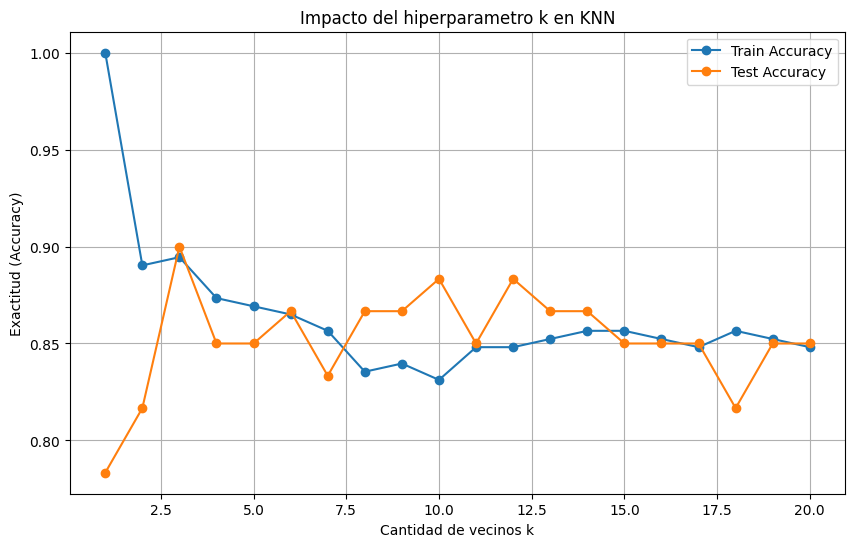

In [29]:
from sklearn.metrics import accuracy_score

# Modificación de los hiperparametros

k_valores = range(1, 21)

train_acc = []
test_acc = []

for k in k_valores:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, knn_k.predict(X_train)))
    test_acc.append(accuracy_score(y_test, knn_k.predict(X_test)))

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(k_valores, train_acc, label='Train Accuracy', marker = 'o')
plt.plot(k_valores, test_acc, label='Test Accuracy', marker = 'o')
plt.xlabel('Cantidad de vecinos k')
plt.ylabel('Exactitud (Accuracy)')
plt.title('Impacto del hiperparametro k en KNN')
plt.legend()
plt.grid(True)
plt.show()

### Conclusión:

En el grafico se observa como variar la cantidad de vecinos k modifica la exactitud (accuracy) del modelo. En un punto como 3 vecinos k se observa que el rendimiento mejoro respecto del analisis con la Regresión Logistica. Con esa cantidad de vecinos k la exactitud subio a ~ 90%. Mientras que con el modelo anterior nos quedabamos en valores cercanos a 84%, valores que más o menos mantiene el modelo KNN independientemente de la cantidad de vecinos k coloquemos.

Esto nos indica que para el analisis del dataset el modelo de KNN sea un poco mejor a la hora de predecir que la Regresión Logistica.



In [34]:
# Analisi de metricas para la cantidad más eficaz de vecinos k

# Modelo con el parametro mas eficaz
knn3 = KNeighborsClassifier(3)

# Entrenamiento del modelo
knn3.fit(X_train, y_train)

# Predicciones
y_pred_train_knn3 = knn3.predict(X_train)
y_pred_test_knn3 = knn3.predict(X_test)

# Matriz de confusión
cmatriz_knn3 = confusion_matrix(y_test, y_pred_test_knn3)

print("============= Matriz de confusión: =============")
print(cmatriz_knn3)

# Metricas del Train
acc_train3 = accuracy_score(y_train, y_pred_train_knn3)
prec_train3 = precision_score(y_train, y_pred_train_knn3)
rec_train3 = recall_score(y_train, y_pred_train_knn3)
f1_train3 = f1_score(y_train, y_pred_train_knn3)

# Metricas del Test
acc_test3 = accuracy_score(y_test, y_pred_test_knn3)
prec_test3 = precision_score(y_test, y_pred_test_knn3)
rec_test3 = recall_score(y_test, y_pred_test_knn3)
f1_test3 = f1_score(y_test, y_pred_test_knn3)

print("\n ============= Metricas del Train: =============")
print(f"Exactitud (accuracy): {acc_train3}")
print(f"Precisión (recision): {prec_train3}")
print(f"Sensibilidad (recall): {rec_train3}")
print(f"F1 Score: {f1_train3}")

print("\n ============= Metricas del Test: =============")
print(f"Exactitud (accuracy): {acc_test3}")
print(f"Precisión (recision): {prec_test3}")
print(f"Sensibilidad (recall): {rec_test3}")
print(f"F1 Score: {f1_test3}")

============= Matriz de confusión: =============
[[29  3]
 [ 3 25]]

 ============= Metricas del Train: =============
Exactitud (accuracy): 0.8945147679324894
Precisión (recision): 0.868421052631579
Sensibilidad (recall): 0.908256880733945
F1 Score: 0.8878923766816144

 ============= Metricas del Test: =============
Exactitud (accuracy): 0.9
Precisión (recision): 0.8928571428571429
Sensibilidad (recall): 0.8928571428571429
F1 Score: 0.8928571428571429


Con el modelo de KNN y una cantidad de vecinos = 3 el estudio pudo predecir bastante mejor, dando como resultado valores mayores en todas las metricas y siendo practicamente iguales las del Train y las del Test.

También la matriz de confusión dio mejores resultados.
Ahora tiene 3 falsos positivos y 3 falsos negativos. Una gran mejora respecto de lo predicho por la Regresión Logistica donde había 4 falsos positivos y 6 falsos negativos.

## 6- Conclusiones

Fundamente, justifique con sus palabras.

Luego de analizar los resultados de la Regresión Logistica y del KNN en los 2 casos analizados (k = 5 y K = 3) podemos concluir que el modelo de KNN es más eficaz a la hora de realizar las predicciones, presento con k = 5 tanto en metricas como en la matriz de confusión mejores resultados que la Regresión Logistica. Pero con K = 3 el modelo mejoro bastante más todavía, presentando todavía mejores valores de metricas y matriz, alcanzando valores ~ 0.90 en todas las metricas y reduciendo la cantidad de falsos negativos y positivos.

Esto se pudo haber dado que el dataset clinico que utilice no tiene una logica lineal y el modelo KNN tuvo mayor capacidad para predicir ya que este no necesita asumir ninguna linealidad. También KNN realiza un mejor trabajo al encontrar ("los vecinos cercanos") pacientes con caracteristicas similares (como puede ser presión alta, colesterol alto y thalassemia alta). Otro punto importante es que el dataset es chico, tiene solo unas 300 filas, lo que ayuda al modelo KNN a ser más eficiente.

# Referencias

Clases dictadas, los colab con contenido subidos al aula virtual y chatgpt para el armado de los graficos fundamentalmente.

# BONUS 1

Si su dataset estaba relativamente balanceado, como bonus pruebe entrenar otro modelo clasificador diferente y comparar resultados con su clasificador elegido en 5) y el modelo elegido 6) luego del tuneo de hiperparámetros.



# BONUS 2

Si su dataset estaba desbalanceado, puebe utilizar alguna técnica para lidiar con el desbalance de clases durante el entrenamiento.

1) Ofrezca una comparativa de entrenar y evaluar modelos de Logistic regression con y sin class_weight='balanced' o el modelo SVC con y sin class_weight='balanced'

2) Pruebe entrenar KNN con y sin uso de SMOTE

( Ver apunte sobre Desbalance de clases de la cátedra )

